In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


In [11]:
import pandas as pd
data = pd.read_excel("TOTAL DATA.xlsx")

In [12]:
data

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
0,1.12,1.299,1.192,1.22,1.0,1,1,1,1
1,1.24,1.320,1.177,1.22,1.0,1,1,1,2
2,1.22,1.230,1.087,1.10,1.0,1,1,1,0
3,1.08,1.153,1.047,1.12,1.0,1,1,1,0
4,1.12,1.167,1.063,1.08,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1307,3.18,3.380,3.170,3.37,1.0,1,1,1,2
1308,3.37,3.400,3.200,3.26,1.0,1,1,1,1
1309,3.26,3.720,3.260,3.54,1.0,1,1,1,2
1310,3.54,3.940,3.530,3.80,1.0,1,1,1,2


In [13]:
data.head()

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
0,1.12,1.299,1.192,1.22,1.0,1,1,1,1
1,1.24,1.320,1.177,1.22,1.0,1,1,1,2
2,1.22,1.230,1.087,1.10,1.0,1,1,1,0
3,1.08,1.153,1.047,1.12,1.0,1,1,1,0
4,1.12,1.167,1.063,1.08,1.0,1,1,1,1


In [14]:
data.tail()

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
1307,3.18,3.38,3.17,3.37,1.0,1,1,1,2
1308,3.37,3.40,3.20,3.26,1.0,1,1,1,1
1309,3.26,3.72,3.26,3.54,1.0,1,1,1,2
1310,3.54,3.94,3.53,3.80,1.0,1,1,1,2
1311,3.80,3.90,3.66,3.79,1.0,1,1,1,0


In [15]:
data.isnull().any()

open       False
high       False
low        False
close      False
EMA 20     False
EMA 50     False
EMA 100    False
EMA200     False
Output     False
dtype: bool

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     1312 non-null   float64
 1   high     1312 non-null   float64
 2   low      1312 non-null   float64
 3   close    1312 non-null   float64
 4   EMA 20   1312 non-null   float64
 5   EMA 50   1312 non-null   int64  
 6   EMA 100  1312 non-null   int64  
 7   EMA200   1312 non-null   int64  
 8   Output   1312 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 92.4 KB


In [17]:
data.describe()

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1.074419,1.126722,1.029415,1.079681,0.625093,0.669207,0.708079,0.757622,1.009909
std,0.854588,0.891333,0.824130,0.858665,0.484199,0.470678,0.454819,0.428685,0.791291
min,0.050000,0.053333,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385000,0.410000,0.366250,0.385000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.870000,0.920000,0.825000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.582500,1.661250,1.525416,1.600000,1.000000,1.000000,1.000000,1.000000,2.000000
max,3.800000,3.966663,3.660000,3.800000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0.5, 1.0, 'Correlation Matrix')]

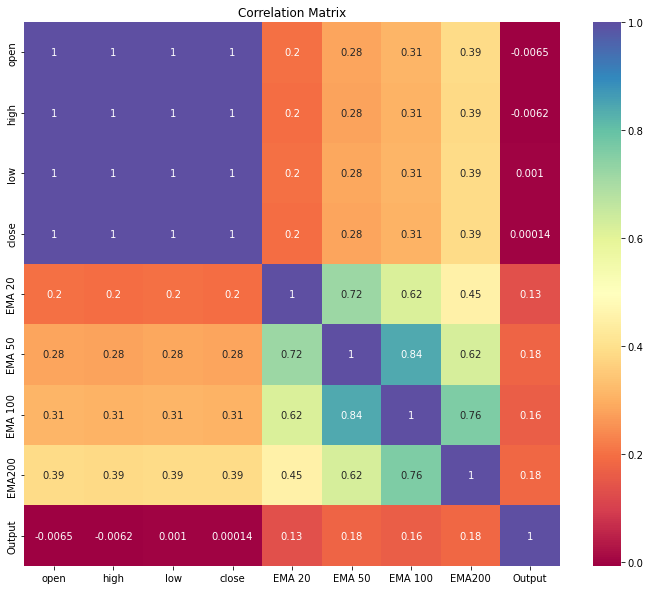

In [19]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [22]:
x = data.iloc[:,:8].values
y = data["Output"].values

print(x.shape)
print(y.shape)


(1312, 8)
(1312,)


In [24]:
x

array([[1.12 , 1.299, 1.192, ..., 1.   , 1.   , 1.   ],
       [1.24 , 1.32 , 1.177, ..., 1.   , 1.   , 1.   ],
       [1.22 , 1.23 , 1.087, ..., 1.   , 1.   , 1.   ],
       ...,
       [3.26 , 3.72 , 3.26 , ..., 1.   , 1.   , 1.   ],
       [3.54 , 3.94 , 3.53 , ..., 1.   , 1.   , 1.   ],
       [3.8  , 3.9  , 3.66 , ..., 1.   , 1.   , 1.   ]])

In [25]:
y

array([1, 2, 0, ..., 2, 2, 0], dtype=int64)

# splitting data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0 )


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


# Regression

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
predict = model.predict(x_test)

In [72]:
predict[:4]

array([0.78293038, 1.25119667, 0.76830177, 1.12623476])

In [73]:
print("Accuracy of training dataset:", model.score(x_train,y_train))
print("Accuracy of test dataset:", model.score(x_test,y_test))

Accuracy of training dataset: 0.061684653028931447
Accuracy of test dataset: 0.0639487413197194


# Build Modle

In [48]:
'''assifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 8, nits = 8 ))

classifier.add(Dense(activation = "relu", units = 14))

classifier.add(Dense(activation = "sigmoid", units = 1))
                        

classifier.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy',metrics = ['accuracy'] )
'''

'assifier = Sequential()\nclassifier.add(Dense(activation = "relu", input_dim = 8, nits = 8 ))\n\nclassifier.add(Dense(activation = "relu", units = 14))\n\nclassifier.add(Dense(activation = "sigmoid", units = 1))\n                        \n\nclassifier.compile(optimizer = \'rmsprop\' , loss = \'binary_crossentropy\',metrics = [\'accuracy\'] )\n'

In [54]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu', input_shape=(64,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [55]:
network.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'] )

In [56]:
network.fit(x_train , y_train , batch_size = 8 ,epochs = 10 )


Epoch 1/10
115/115 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.3693
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: -0.4650 - accuracy: 0.3834
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: -1.3625 - accuracy: 0.3834
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: -3.1001 - accuracy: 0.3834
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: -6.9629 - accuracy: 0.3834
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: -14.0269 - accuracy: 0.3834
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: -26.0708 - accuracy: 0.3834
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: -44.3911 - accuracy: 0.3834
Epoch 9/10
115/115 [==============================] - 0s 3ms/step - loss: -72.1940 - accuracy: 0.3834
Epoch 10/10
115/115 [==============================] - 0s 3ms/step - loss: -111.5169 - a

In [57]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [58]:
y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ...,  True,  True,  True]])

# Code: Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [64]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)


NameError: name 'cm' is not defined